In [ ]:
pip install seaborn

In [23]:
# Import all relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

### Data understandings

In [12]:
df = pd.read_excel("merged_pollutants_final.xlsx")

In [13]:
df.head()

,Unnamed: 0,Year,Borough,PM10,PM2.5,NOx,CO2,SO2,NMVOC,"1,3 Buta",...,C6H6,CO,CH4,N2O,Cd,Hg,Pb,BaP,PCB,HCl
0,6710,2013,NonGLA,0.130963,0.085784,1.213751,657.304039,0.617954,0.151999,0.000639,...,0.003965,1.598706,0.712821,0.564073,0.000011,0.000003,0.000052,1.299061e-06,1.373872e-06,0.0
1,6711,2013,NonGLA,5.010572,1.814326,41.850106,14568.389161,0.619518,0.126560,0.000858,...,0.004541,1.574760,0.261035,0.839242,0.000012,0.000003,0.000045,4.766745e-07,3.934605e-07,0.0
2,6712,2013,NonGLA,2.889030,1.017989,23.079704,8034.721767,0.624707,0.205273,0.001266,...,0.005471,1.540182,0.543780,0.785585,0.000012,0.000003,0.000049,7.196872e-07,9.018982e-07,0.0
3,6713,2013,NonGLA,0.148034,0.100359,2.068405,9313.431445,0.604540,0.236015,0.000888,...,0.008788,1.936277,1.384252,0.424445,0.000012,0.000002,0.000043,3.763843e-07,2.899396e-04,0.0
4,6714,2013,NonGLA,0.134681,0.090045,1.942320,4275.182041,0.603073,0.215074,0.000674,...,0.008041,1.741540,1.349165,0.449739,0.000012,0.000002,0.000042,2.543477e-07,1.003148e-04,0.0


In [14]:
# Remove unamed column. This is the old index column carried over from the unfiltered merged file
df = df.drop(['Unnamed: 0'], axis=1)

In [15]:
df.shape

(3355, 20)

In [16]:
# Checking the general information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3355 entries, 0 to 3354
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      3355 non-null   int64  
 1   Borough   3355 non-null   object 
 2   PM10      3355 non-null   float64
 3   PM2.5     3355 non-null   float64
 4   NOx       3355 non-null   float64
 5    CO2      3355 non-null   float64
 6    SO2      3355 non-null   float64
 7   NMVOC     3355 non-null   float64
 8   1,3 Buta  3355 non-null   float64
 9   NH3       3355 non-null   float64
 10  C6H6      3355 non-null   float64
 11  CO        3355 non-null   float64
 12  CH4       3355 non-null   float64
 13  N2O       3355 non-null   float64
 14  Cd        3355 non-null   float64
 15  Hg        3355 non-null   float64
 16  Pb        3355 non-null   float64
 17  BaP       3355 non-null   float64
 18  PCB       3355 non-null   float64
 19  HCl       3355 non-null   float64
dtypes: float64(18), int64(1), obje

In [17]:
df.isnull().sum()

Year        0
Borough     0
PM10        0
PM2.5       0
NOx         0
 CO2        0
 SO2        0
NMVOC       0
1,3 Buta    0
NH3         0
C6H6        0
CO          0
CH4         0
N2O         0
Cd          0
Hg          0
Pb          0
BaP         0
PCB         0
HCl         0
dtype: int64

In [18]:
# Show the descriptive statistics of the values present in the dataset
df.describe()

,Year,PM10,PM2.5,NOx,CO2,SO2,NMVOC,"1,3 Buta",NH3,C6H6,CO,CH4,N2O,Cd,Hg,Pb,BaP,PCB,HCl
count,3355.0,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3355.000000,3.355000e+03,3.355000e+03,3355.000000,3355.000000,3355.000000,3.355000e+03,3.355000e+03,3.355000e+03,3.355000e+03,3.355000e+03,3355.000000
mean,2013.0,1.761000,0.875801,17.918331,8439.796549,1.875560,2.176984,0.009949,5.265350e-01,4.998990e-02,13.983365,7.988109,0.332697,1.878655e-05,4.215938e-06,9.114996e-05,4.516952e-06,2.182779e-05,0.008614
std,0.0,1.908657,1.033515,28.124380,15615.659093,9.149480,5.431230,0.048601,4.883618e+00,1.295513e-01,42.755051,123.967662,2.667888,2.210817e-05,5.302815e-06,5.269526e-04,6.661501e-06,6.501275e-05,0.353009
min,2013.0,0.000008,0.000007,0.000134,0.056202,0.000001,0.000026,0.000000,6.462055e-07,5.779028e-07,0.000113,0.000240,0.000002,4.600946e-10,1.153994e-10,2.645969e-09,7.343127e-11,0.000000e+00,0.000000
25%,2013.0,0.298265,0.165529,2.859355,1701.358329,0.331116,0.141275,0.000406,1.925831e-02,3.830387e-03,1.136795,0.260986,0.020792,5.363860e-06,1.121744e-06,2.579344e-05,3.360292e-07,1.109764e-07,0.000000
50%,2013.0,1.175279,0.593316,10.485957,5918.161313,0.681673,0.410959,0.001640,8.102388e-02,1.860809e-02,4.904528,0.656451,0.063221,1.166161e-05,2.494430e-06,5.374709e-05,1.832111e-06,2.331320e-06,0.000000
75%,2013.0,2.498567,1.242954,23.150052,11458.759498,1.306769,1.233712,0.004595,3.606869e-01,4.934966e-02,12.649107,1.203347,0.208344,2.244708e-05,5.172596e-06,1.094762e-04,6.205437e-06,1.645618e-05,0.000000
max,2013.0,17.280088,14.183550,590.911876,507729.548765,199.332507,110.139507,0.939484,1.780037e+02,2.154251e+00,738.146660,4780.885074,86.234086,1.763648e-04,6.268141e-05,3.011154e-02,7.386448e-05,9.313450e-04,15.000000


In [19]:
# Show number of unique values per column
df.nunique()

Year           1
Borough       34
PM10        3355
PM2.5       3355
NOx         3355
 CO2        3355
 SO2        3355
NMVOC       3355
1,3 Buta    3334
NH3         3355
C6H6        3355
CO          3355
CH4         3355
N2O         3355
Cd          3355
Hg          3355
Pb          3355
BaP         3355
PCB         3354
HCl            3
dtype: int64

In [20]:
# Show list of all columns in the dataset
df.columns

Index(['Year', 'Borough', 'PM10', 'PM2.5', 'NOx', ' CO2', ' SO2', 'NMVOC',
       '1,3 Buta', 'NH3', 'C6H6', 'CO', 'CH4', 'N2O', 'Cd', 'Hg', 'Pb', 'BaP',
       'PCB', 'HCl'],
      dtype='object')

In [31]:
# Rename columns with space in their spelling
df.columns = df.columns.str.replace(' ', '')

In [32]:
df.columns

Index(['Year', 'Borough', 'PM10', 'PM2.5', 'NOx', 'CO2', 'SO2', 'NMVOC',
       '1,3Buta', 'NH3', 'C6H6', 'CO', 'CH4', 'N2O', 'Cd', 'Hg', 'Pb', 'BaP',
       'PCB', 'HCl'],
      dtype='object')

### Data Visualisation

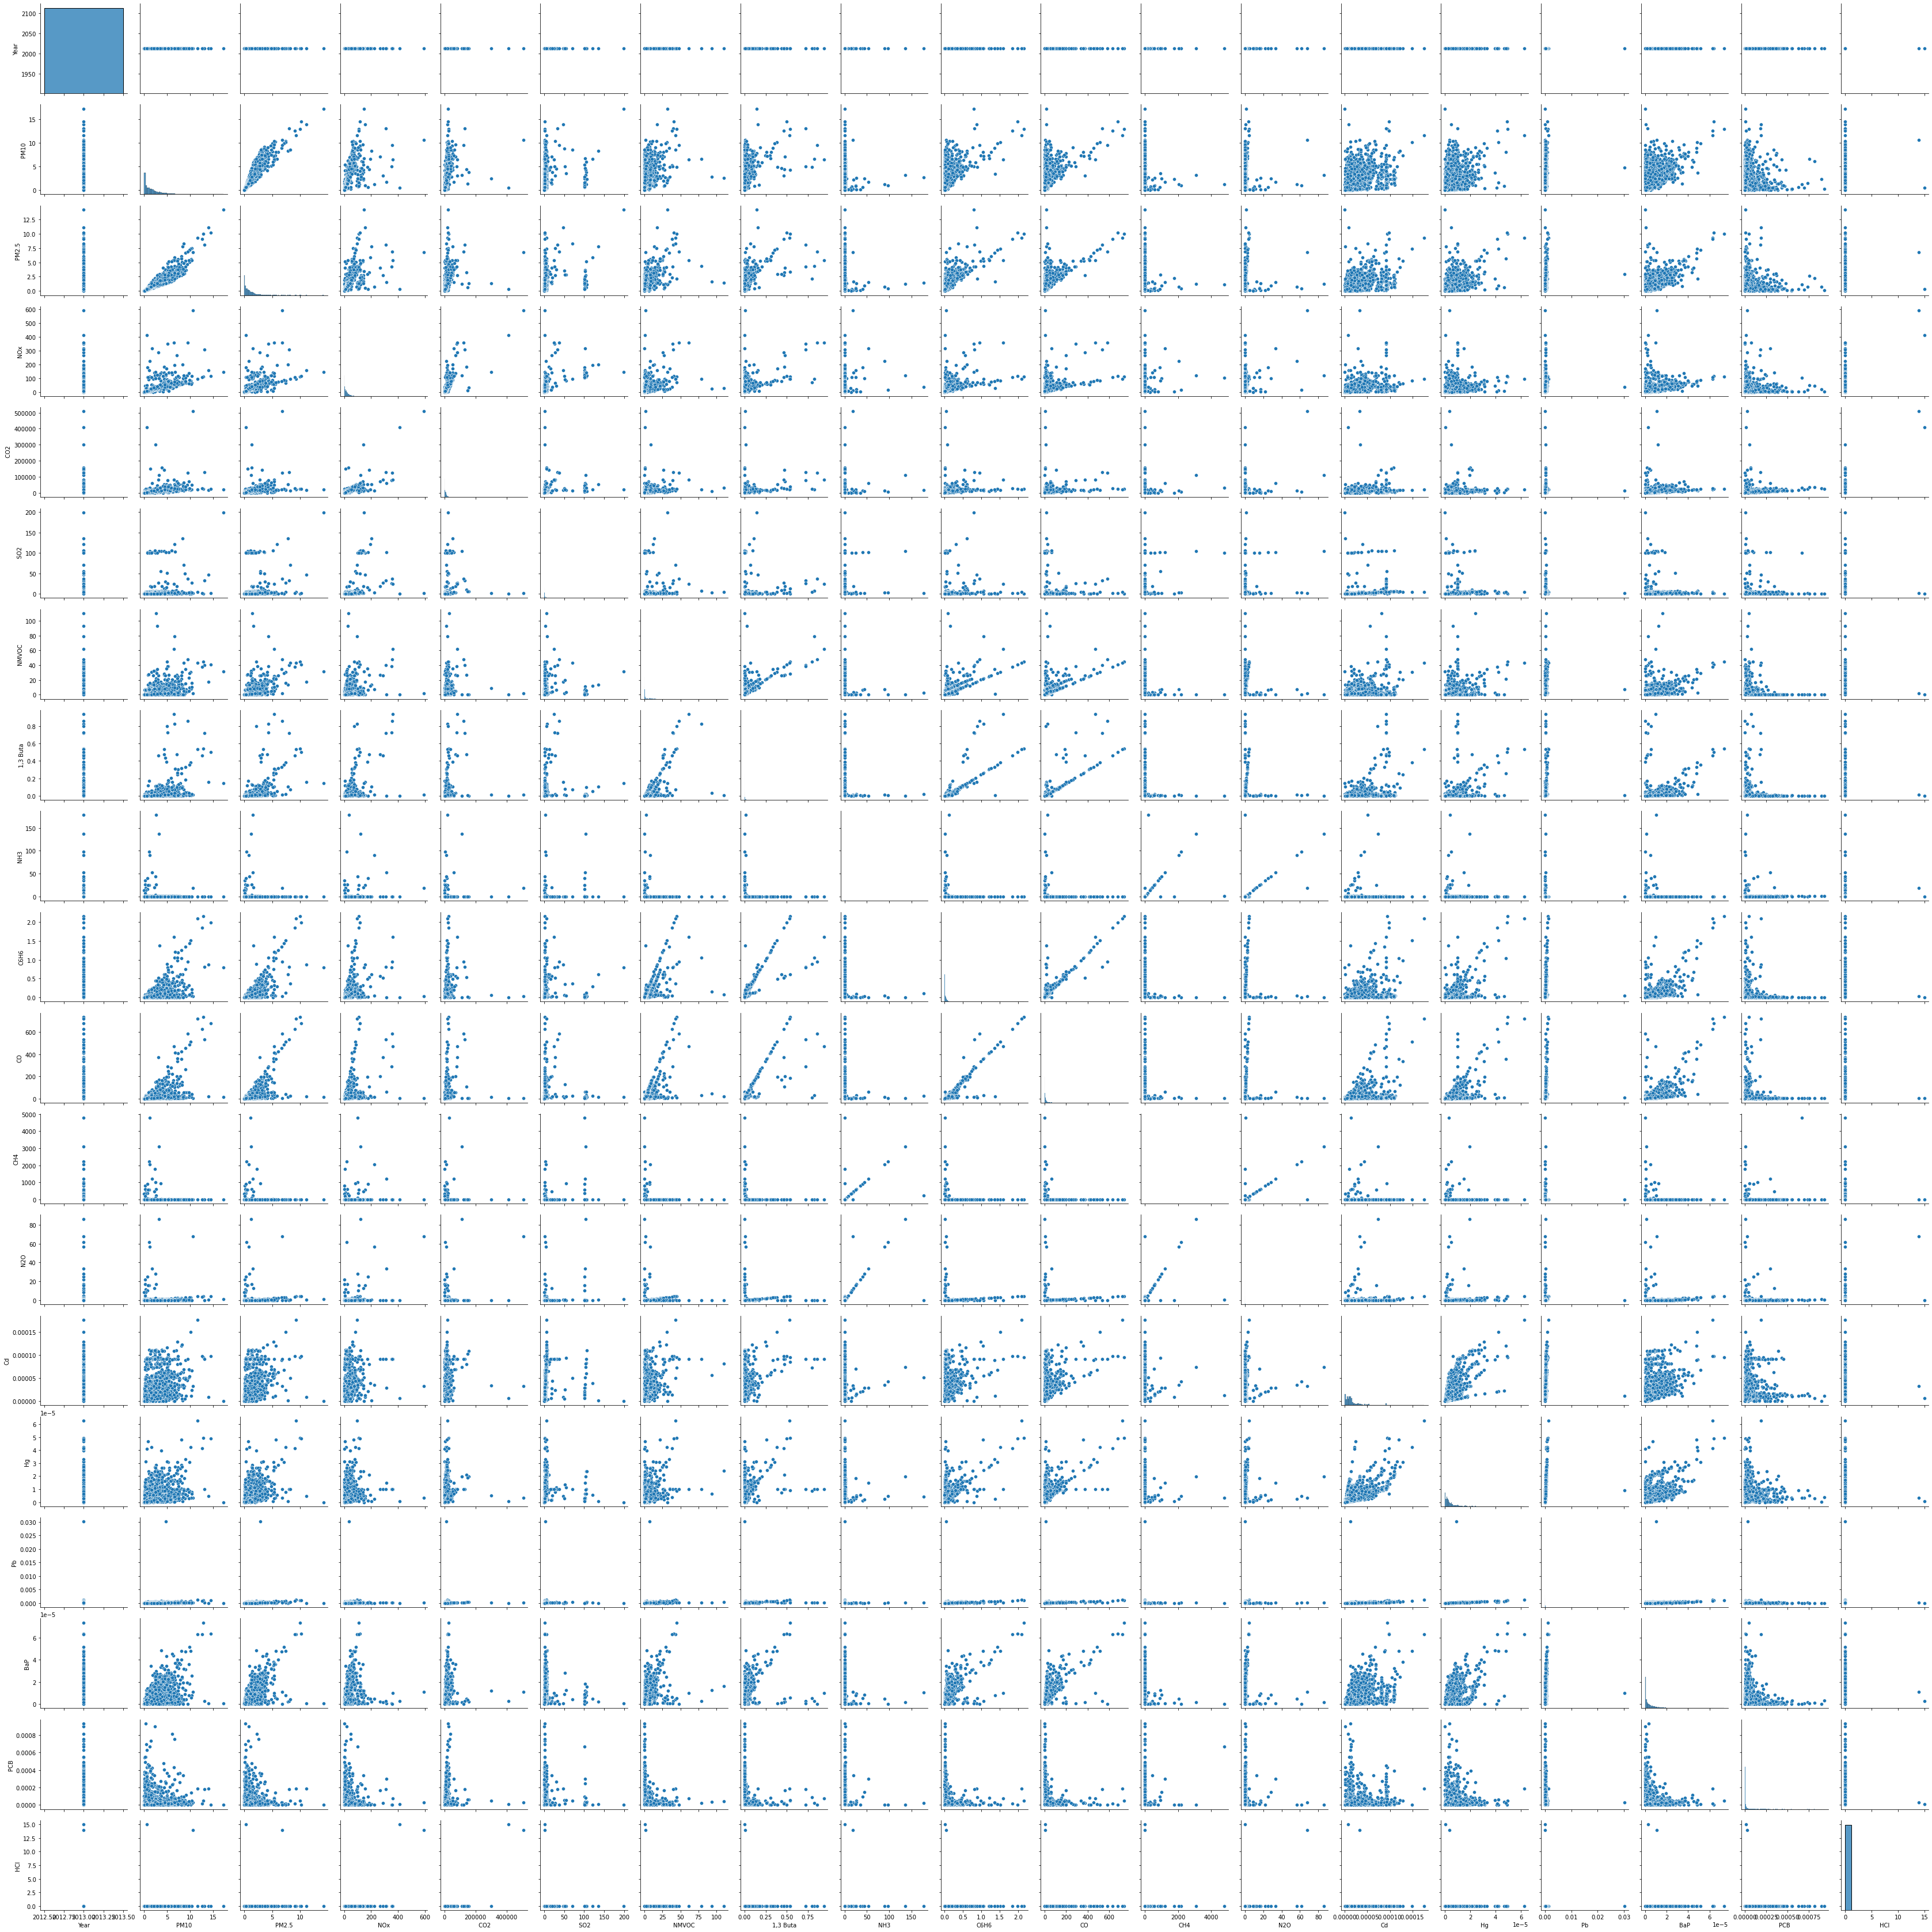

In [24]:
sns.pairplot(data=df)

In [25]:
# Show the count of values in the Borough column
df['Borough'].value_counts()

NonGLA                    1010
Bromley                    191
Hillingdon                 155
Havering                   150
Croydon                    119
Barnet                     115
Enfield                    107
Richmond                    88
Bexley                      87
Ealing                      82
Redbridge                   82
Hounslow                    81
Greenwich                   77
Harrow                      73
Brent                       66
Sutton                      65
Barking and Dagenham        59
Kingston                    59
Wandsworth                  57
Waltham Forest              57
Newham                      55
Lewisham                    53
Southwark                   53
Merton                      53
Lambeth                     50
City of Westminster         47
Haringey                    45
Camden                      41
Hackney                     39
Tower Hamlets               39
Hammersmith and Fulham      32
Islington                   32
Kensingt

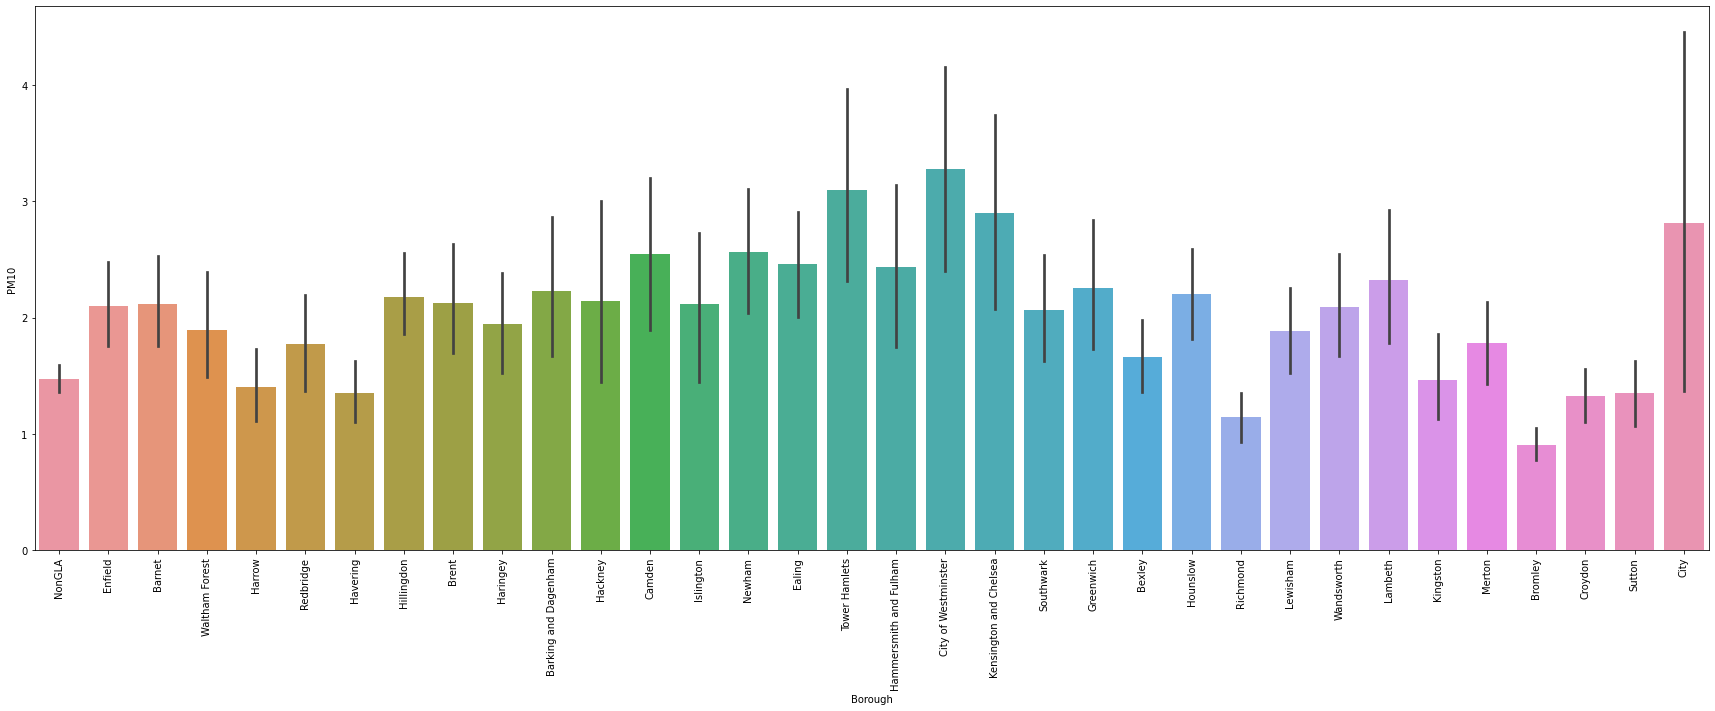

In [38]:
# Show each emission level by state
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='Borough',y='PM10',data=df);

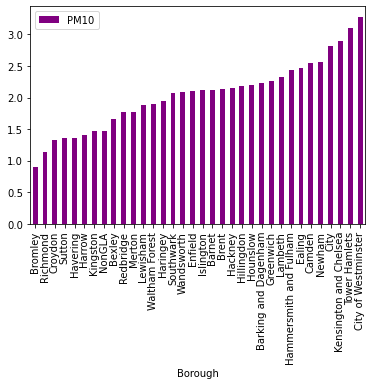

In [41]:
# Show pollutant emission level in ascending order using the groupby function
df[['PM10', 'Borough']].groupby(['Borough']).mean().sort_values(by='PM10').plot.bar(color='purple')
plt.show()